# Salary Project:
## Problem Statement
### Predict the salary if the employee using the features provided in the data.

In [1]:
# import libraries
import pandas as pd 
import numpy as np

In [2]:
# load the dataset 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# EDA

##### 1. identification of variables and data types

In [3]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

here we observe that, [rank,discipline,sex] are object data and rest columns are of int type

##### 2. analysing the basic metrics

In [5]:
df.shape

(397, 6)

we have 397 rows and 6 columns 

##### 3. non-graphical analysis

In [6]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


here we observe that, all the stats of our data looks good as values in quantile range and value of std and mean looks relatable and satisfied

##### 4. missing value treatment

In [7]:
# checking null values

df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

we can see there is no null value in our dataset

In [10]:
# checking duplicate data

df[df.duplicated()]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
151,AsstProf,B,4,4,Male,92000
163,AsstProf,B,3,3,Male,89942
197,AsstProf,B,4,4,Male,92000
200,AsstProf,B,4,4,Male,92700


In [12]:
# dropping duplicate rows

df.drop([151,163,197,200],axis=0,inplace = True)

In [13]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [28]:
# checking empty spaces

df.loc[df['salary']==" "]


,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [29]:
df.loc[df['sex']==" "]


,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [30]:
df.loc[df['yrs.service']==" "]


,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [31]:
df.loc[df['yrs.since.phd']==" "]


,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [32]:
df.loc[df['discipline']==" "]


,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [33]:
df.loc[df['rank']==" "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


here we observe that, there are no empty spaces in any row

#####  5. draphical analysis

In [34]:
# importingne necessary library
import seaborn as sns
import matplotlib.pyplot as plt

Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64


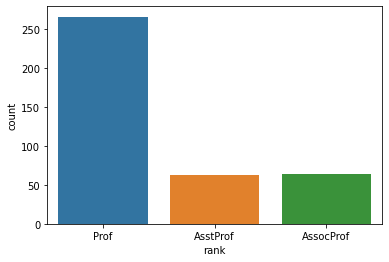

In [37]:
ax = sns.countplot(x="rank",data=df)
print(df["rank"].value_counts())

rrom above observations total no of prof = 266 , assocprof = 64 , asstprof = 63

B    212
A    181
Name: discipline, dtype: int64


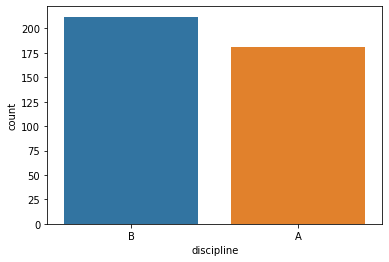

In [39]:
ax = sns.countplot(x="discipline",data=df)
print(df["discipline"].value_counts())

from above observations type A = 181 and type B = 212

Male      354
Female     39
Name: sex, dtype: int64


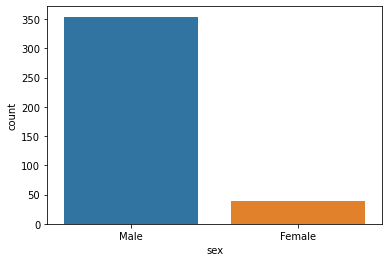

In [40]:
ax = sns.countplot(x="sex",data=df)
print(df["sex"].value_counts())

we can see there are very less female tha men that is female = 39 male = 354

In [43]:
import warnings
warnings.filterwarnings('ignore')

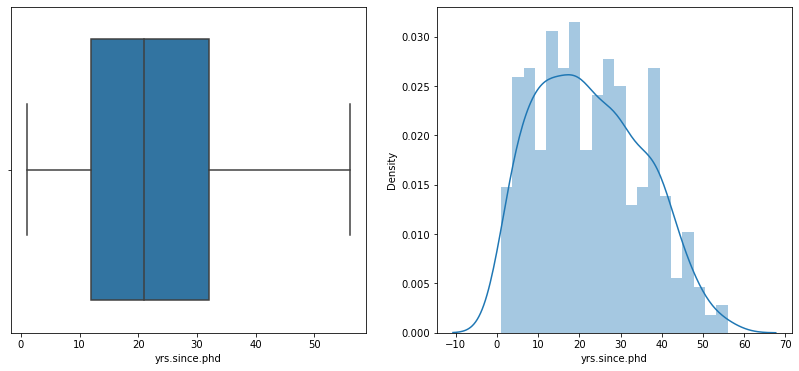

In [44]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(x='yrs.since.phd',data=df)
plt.subplot(1,2,2)
sns.distplot(df['yrs.since.phd'], bins=20)
plt.show()

*It can be seen that there is no outlier in 'yrs.since.phd' column

*The Distribution of 'yrs.since.phd' is looks like normal distribution, will confirm with Skewness.

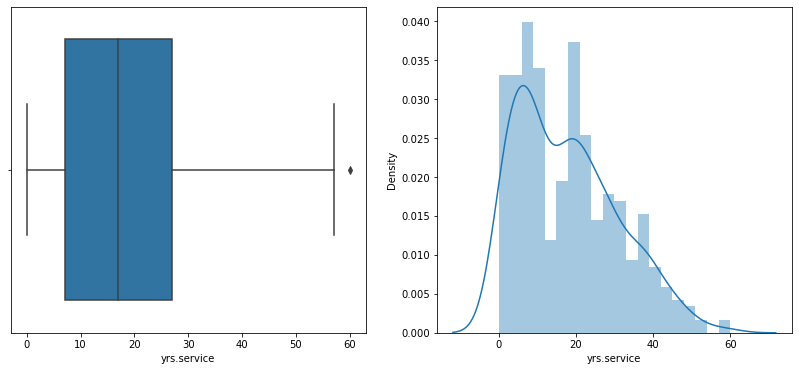

In [46]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(x='yrs.service',data=df)
plt.subplot(1,2,2)
sns.distplot(df['yrs.service'], bins=20)
plt.show()

It can be seen that there are some potential Outliers which we have to deal with.

The Distribution of 'yrs.service' is not looks like normal distribution, will confirm with Skewness.

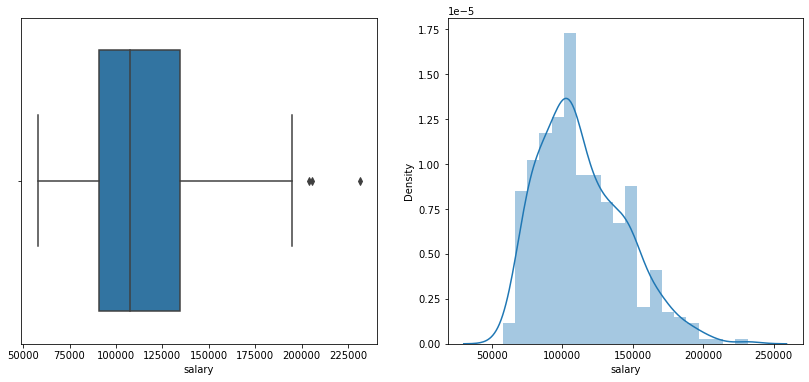

In [56]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(x='salary',data=df)
plt.subplot(1,2,2)
sns.distplot(df['salary'], bins=20)
plt.show()

*It can be seen that there is no outlier in 'salary' column

*The Distribution of 'salary' is looks like normal distribution, will confirm with Skewness.

##### 6. bivariate analysis

Text(0, 0.5, 'salary')

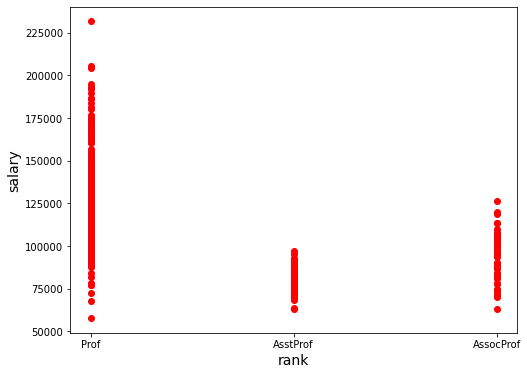

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x='rank',y='salary',color='r',data=df)
plt.xlabel('rank',fontsize=14)
plt.ylabel('salary',fontsize=14)

Text(0, 0.5, 'salary')

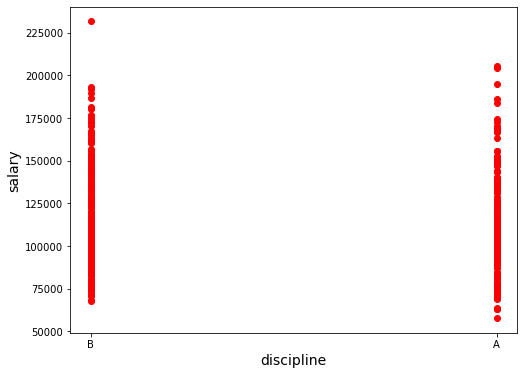

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x='discipline',y='salary',color='r',data=df)
plt.xlabel('discipline',fontsize=14)
plt.ylabel('salary',fontsize=14)

Text(0, 0.5, 'salary')

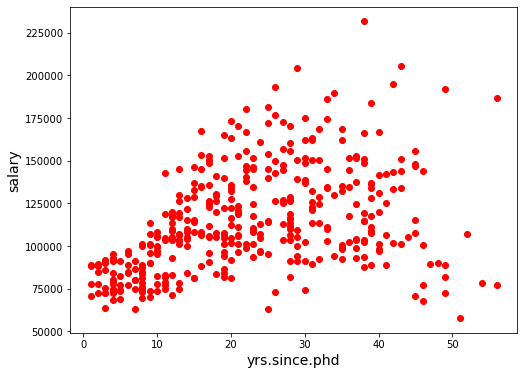

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x='yrs.since.phd',y='salary',color='r',data=df)
plt.xlabel('yrs.since.phd',fontsize=14)
plt.ylabel('salary',fontsize=14)

here we observe that graph follows a trend which means that there is relation between salary and yrs.scince.pgh

Text(0, 0.5, 'salary')

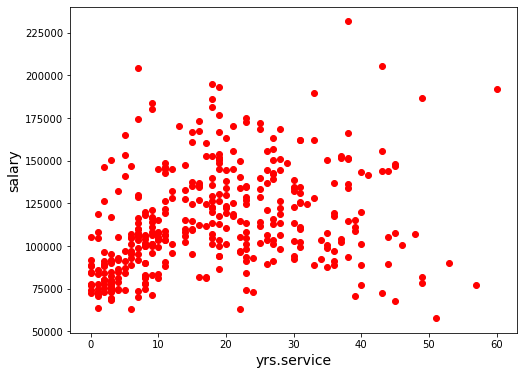

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x='yrs.service',y='salary',color='r',data=df)
plt.xlabel('yrs.service',fontsize=14)
plt.ylabel('salary',fontsize=14)

here we observe that graph follows a trend which means that there is relation between salary and yrs.service

Text(0, 0.5, 'salary')

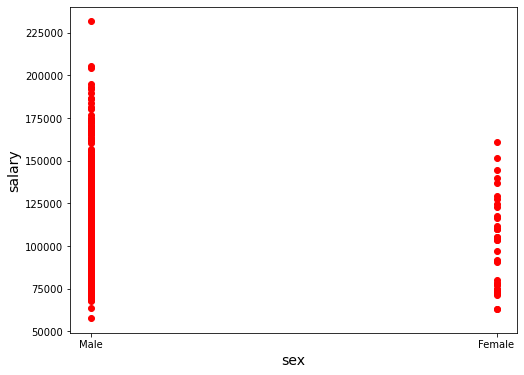

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x='sex',y='salary',color='r',data=df)
plt.xlabel('sex',fontsize=14)
plt.ylabel('salary',fontsize=14)

##### 7. variable transformation

In [54]:
# importing OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [55]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df        

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


checking skewness

In [57]:
df.skew()

rank            -1.170826
discipline      -0.158861
yrs.since.phd    0.295915
yrs.service      0.638491
sex             -2.691158
salary           0.698471
dtype: float64

skewness threshhold is between +/-0.30 , so we can see data in rank, yrs.service, salary are skewed

##### 8. data cleaning 

In [59]:
#checking correlation
df.corr()['salary'].sort_values()

sex              0.141521
discipline       0.164018
yrs.service      0.329624
yrs.since.phd    0.414042
rank             0.519823
salary           1.000000
Name: salary, dtype: float64

In [1]:
# removing outliers using z score

In [61]:
from scipy.stats import zscore

In [62]:
z = np.abs(zscore(df))
z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.640644,0.923999,0.273772,0.018820,0.331918,0.851500
1,0.640644,0.923999,0.195636,0.135268,0.331918,1.954661
2,0.677540,0.923999,1.445800,1.136841,0.331918,1.127264
3,0.640644,0.923999,1.757745,1.636745,0.331918,0.035260
4,0.640644,0.923999,1.367068,1.790834,0.331918,0.909214
...,...,...,...,...,...,...
392,0.640644,1.082253,0.820122,0.943349,0.331918,0.356997
393,0.640644,1.082253,0.663851,0.095864,0.331918,1.208140
394,0.640644,1.082253,1.523339,0.558128,0.331918,0.402113
395,0.640644,1.082253,0.195040,0.212312,0.331918,0.613478


In [64]:
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 152, 177, 184, 214,
        226, 227, 229, 233, 241, 249, 250, 270, 312, 319, 326, 328, 330,
        337, 354, 357, 360], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [65]:
new_df = df[(z<3).all(axis=1)]


In [66]:
print("old data frame",df.shape)
print("new data frame",new_df.shape)

old data frame (393, 6)
new data frame (350, 6)


spliting data into independent and dependent COLUMNS

In [67]:
from sklearn.preprocessing import power_transform

In [72]:
x = new_df.iloc[:,:-1]

In [69]:
y = new_df.iloc[:,-1]

In [74]:
x = power_transform(x,method='yeo-johnson')

In [75]:
type(x)

numpy.ndarray

In [76]:
x

array([[ 0.65114532,  0.92295821, -0.19498882,  0.19513   ,  0.        ],
       [ 0.65114532,  0.92295821, -0.1155064 ,  0.04589326,  0.        ],
       [-1.21186053,  0.92295821, -1.67435269, -1.3392448 ,  0.        ],
       ...,
       [ 0.65114532, -1.08347268,  1.38546425,  0.65917957,  0.        ],
       [ 0.65114532, -1.08347268,  0.26287215, -0.03231518,  0.        ],
       [-1.21186053, -1.08347268, -1.1999892 , -1.18051518,  0.        ]])

transform my dataset into standart normal distribution

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.65114532,  0.92295821, -0.19498882,  0.19513   ,  0.        ],
       [ 0.65114532,  0.92295821, -0.1155064 ,  0.04589326,  0.        ],
       [-1.21186053,  0.92295821, -1.67435269, -1.3392448 ,  0.        ],
       ...,
       [ 0.65114532, -1.08347268,  1.38546425,  0.65917957,  0.        ],
       [ 0.65114532, -1.08347268,  0.26287215, -0.03231518,  0.        ],
       [-1.21186053, -1.08347268, -1.1999892 , -1.18051518,  0.        ]])

In [83]:
# removing skewness from target column
y=np.sqrt(y)

In [84]:
y.skew()

0.3199963412122632

we can see skewness is removed

### now selcting target and features

In [91]:
feature = x

In [86]:
target = y

performing train_test_split

In [88]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [89]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"at random state {i},the training accuracy is : ,{r2_score(target_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is : ,{r2_score(target_test,pred_test)}")
    print("\n")

at random state 0,the training accuracy is : ,0.3825077335922691
at random state 0,the testing accuracy is : ,0.47515222847018


at random state 1,the training accuracy is : ,0.38704978045614125
at random state 1,the testing accuracy is : ,0.47793041723921126


at random state 2,the training accuracy is : ,0.42366032275091436
at random state 2,the testing accuracy is : ,0.3437212929163378


at random state 3,the training accuracy is : ,0.40425201490996965
at random state 3,the testing accuracy is : ,0.422486592459947


at random state 4,the training accuracy is : ,0.3978935547543736
at random state 4,the testing accuracy is : ,0.45096411251014834


at random state 5,the training accuracy is : ,0.43417625351101097
at random state 5,the testing accuracy is : ,0.31527337369938213


at random state 6,the training accuracy is : ,0.40317656301046845
at random state 6,the testing accuracy is : ,0.4280947869052535


at random state 7,the training accuracy is : ,0.44336413805090713
at random st

##### we will select random state = 60 as difference between testing and training accuracy is very less

In [94]:
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,random_state=60)

In [95]:
lr.fit(feature_train,target_train)

LinearRegression()

In [96]:
 pred_train=lr.predict(feature_train)

In [97]:
print(r2_score(target_train,pred_train))

0.4066859947939181


we get r2_score = 0.4066859947939181

###  cross-validation of the model

In [98]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,feature,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} cv score is {cv_mean} and accuracy score of taining is {train_accuracy} and accuracy score of testing is {test_accuracy}")
    print('\n')

at cross fold 2 cv score is 0.3638465722137146 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 3 cv score is 0.3494556286318164 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 4 cv score is 0.3534421297971818 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 5 cv score is 0.3427301725992527 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 6 cv score is 0.3521522336777474 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 7 cv score is 0.3630037566133821 and accuracy score of taining is 0.4066859947939181 and accuracy score of testing is -0.40764145792935746


at cross fold 8 cv score is 0.368217720841426 and accuracy score of ta

since number of flod dont have much impact on accurary and cv_score so we select cv=2

over and under fitting checking

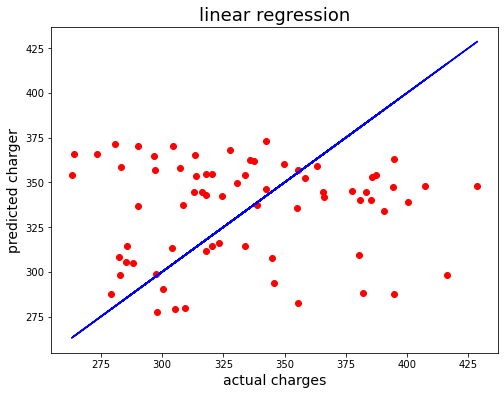

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('actual charges',fontsize=14)
plt.ylabel('predicted charger',fontsize=14)
plt.title('linear regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],
             'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)


{'alpha': 0.01, 'random_state': 0}


In [103]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(feature_train,target_train)
ls_score_training=ls.score(feature_train,target_train)
pred_ls=ls.predict(feature_test)
ls_score_training*100

40.668459169498725

In [104]:
pred_ls=ls.predict(feature_test)

In [105]:
lss=r2_score(target_test,pred_ls)
lss*100

41.63827516184702

In [106]:
cv_score=cross_val_score(ls,feature,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

34.30097817159393

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion' :['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(feature_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [108]:
rf = RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(feature_train,target_train)
rf.score(feature_train,target_train)
pred_decision = rf.predict(feature_test)

rfs = r2_score(target_test,pred_decision)
print("R2 score : ",rfs*100)

rfscore = cross_val_score(rf,feature,target,cv=5)
rfc = rfscore.mean()
print('cross val score : ',rfc*100)

R2 score :  26.718347768699925
cross val score :  28.670261362116527


##### we will go with lasso  as it gives more accuracy

### saving model

In [110]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename,'wb'))